In [1]:
import osmnx as ox

poi_tags = {
    "amenity": [
        "restaurant"]}

poi_gdf = ox.features_from_point(
    (35.658514, 139.70133),  # Tokyo Tower coordinates
    tags=poi_tags,
    dist=1000,  # Search radius in meters
    )

# Filter to include only nodes, not ways and relations
poi_gdf = poi_gdf[poi_gdf.index.get_level_values("element") == "node"]
poi_gdf

geometry     amenity           cuisine  \
element id                                                                      
node    597694711    POINT (139.69521 35.66296)  restaurant            korean   
        701817631      POINT (139.7081 35.6635)  restaurant               NaN   
        742561055    POINT (139.70051 35.65583)  restaurant  italian;japanese   
        752870757    POINT (139.70428 35.65204)  restaurant               NaN   
        760366321    POINT (139.69935 35.65974)  restaurant               NaN   
...                                         ...         ...               ...   
        13012902095  POINT (139.70269 35.66241)  restaurant           italian   
        13015106468  POINT (139.70186 35.66133)  restaurant            burger   
        13067764995  POINT (139.69867 35.65855)  restaurant               NaN   
        13175942486  POINT (139.70903 35.66722)  restaurant             ramen   
        13232507368  POINT (139.70445 35.65921)  restaurant           italian   

                                       name            name:en wheelchair  \
element id                                                                  
node    597694711                     チャングミ           Changumi    limited   
        701817631                Las Chicas                NaN        NaN   
        742561055                     ジョナサン         Jonathan's         no   
        752870757           Bistro Sarugaku                NaN        NaN   
        760366321                  不二家レストラン  Fujiya Restaurant        NaN   
...                                     ...                ...        ...   
        13012902095           THE RIGOLETTO                NaN        NaN   
        13015106468              JB's TOKYO                NaN        NaN   
        13067764995  Teuchi Soba Takenouchi                NaN        NaN   
        13175942486                     蝋燭屋           Rōsokuya        NaN   
        13232507368      TRATTORIA PIZZERIA                NaN        NaN   

                          brand    brand:en brand:ja brand:wikidata  ...  \
element id                                                           ...   
node    597694711           NaN         NaN      NaN            NaN  ...   
        701817631           NaN         NaN      NaN            NaN  ...   
        742561055         ジョナサン  Jonathan's    ジョナサン      Q11310628  ...   
        752870757           NaN         NaN      NaN            NaN  ...   
        760366321           NaN         NaN      NaN            NaN  ...   
...                         ...         ...      ...            ...  ...   
        13012902095         NaN         NaN      NaN            NaN  ...   
        13015106468  JB's TOKYO         NaN      NaN            NaN  ...   
        13067764995         NaN         NaN      NaN            NaN  ...   
        13175942486         NaN         NaN      NaN            NaN  ...   
        13232507368         NaN         NaN      NaN            NaN  ...   

                    name:ja-Latn shop internet_access:fee alt_name:fr  \
element id                                                              
node    597694711            NaN  NaN                 NaN         NaN   
        701817631            NaN  NaN                 NaN         NaN   
        742561055            NaN  NaN                 NaN         NaN   
        752870757            NaN  NaN                 NaN         NaN   
        760366321            NaN  NaN                 NaN         NaN   
...                          ...  ...                 ...         ...   
        13012902095          NaN  NaN                 NaN         NaN   
        13015106468          NaN  NaN                 NaN         NaN   
        13067764995          NaN  NaN                 NaN         NaN   
        13175942486          NaN  NaN                 NaN         NaN   
        13232507368          NaN  NaN                 NaN         NaN   

                    official_name official_n

In [2]:
# Reproject to a projected CRS for accurate centroids
poi_gdf = poi_gdf.to_crs(epsg=6677)
poi_gdf

geometry     amenity  \
element id                                                       
node    597694711    POINT (-12505.002 -37383.921)  restaurant   
        701817631    POINT (-11338.595 -37326.252)  restaurant   
        742561055    POINT (-12026.118 -38175.896)  restaurant   
        752870757    POINT (-11685.578 -38596.331)  restaurant   
        760366321    POINT (-12130.685 -37741.439)  restaurant   
...                                            ...         ...   
        13012902095  POINT (-11827.904 -37446.053)  restaurant   
        13015106468  POINT (-11903.129 -37565.471)  restaurant   
        13067764995  POINT (-12192.506 -37874.208)  restaurant   
        13175942486  POINT (-11253.856 -36913.167)  restaurant   
        13232507368   POINT (-11669.26 -37801.754)  restaurant   

                              cuisine                    name  \
element id                                                      
node    597694711              korean                   チャングミ   
        701817631                 NaN              Las Chicas   
        742561055    italian;japanese                   ジョナサン   
        752870757                 NaN         Bistro Sarugaku   
        760366321                 NaN                不二家レストラン   
...                               ...                     ...   
        13012902095           italian           THE RIGOLETTO   
        13015106468            burger              JB's TOKYO   
        13067764995               NaN  Teuchi Soba Takenouchi   
        13175942486             ramen                     蝋燭屋   
        13232507368           italian      TRATTORIA PIZZERIA   

                               name:en wheelchair       brand    brand:en  \
element id                                                                  
node    597694711             Changumi    limited         NaN         NaN   
        701817631                  NaN        NaN         NaN         NaN   
        742561055           Jonathan's         no       ジョナサン  Jonathan's   
        752870757                  NaN        NaN         NaN         NaN   
        760366321    Fujiya Restaurant        NaN         NaN         NaN   
...                                ...        ...         ...         ...   
        13012902095                NaN        NaN         NaN         NaN   
        13015106468                NaN        NaN  JB's TOKYO         NaN   
        13067764995                NaN        NaN         NaN         NaN   
        13175942486           Rōsokuya        NaN         NaN         NaN   
        13232507368                NaN        NaN         NaN         NaN   

                    brand:ja brand:wikidata  ... name:ja-Latn shop  \
element id                                   ...                     
node    597694711        NaN            NaN  ...          NaN  NaN   
        701817631        NaN            NaN  ...          NaN  NaN   
        742561055      ジョナサン      Q11310628  ...          NaN  NaN   
        752870757        NaN            NaN  ...          NaN  NaN   
        760366321        NaN            NaN  ...          NaN  NaN   
...                      ...            ...  ...          ...  ...   
        13012902095      NaN            NaN  ...          NaN  NaN   
        13015106468      NaN            NaN  ...          NaN  NaN   
        13067764995      NaN            NaN  ...          NaN  NaN   
        13175942486      NaN            NaN  ...          NaN  NaN   
        13232507368      NaN            NaN  ...          NaN  NaN   

                    internet_access:fee alt_name:fr official_name  \
element id                                                          
node    597694711                   NaN         NaN           NaN   
        701817631                   NaN         NaN           NaN   
        742561055                   NaN         NaN           NaN   
        752870757                   NaN         NaN           NaN   
        76

In [4]:
def get_node_positions(gdf):
    """Extract node positions from GeoDataFrame."""
    node_positions = {}
    for id, geom in gdf["geometry"].items():
        if geom.geom_type == "Point":
            node_positions[id] = (geom.x, geom.y)
        else:
            centroid = geom.centroid
            node_positions[id] = (centroid.x, centroid.y)
    return node_positions

node_positions = get_node_positions(poi_gdf)
node_positions

{('node', 597694711): (-12505.00210184257, -37383.9207664227),
 ('node', 701817631): (-11338.59537760442, -37326.25174428184),
 ('node', 742561055): (-12026.117786429772, -38175.8962421999),
 ('node', 752870757): (-11685.577679177499, -38596.33111526908),
 ('node', 760366321): (-12130.684535879627, -37741.43906285194),
 ('node', 861115195): (-12356.505546299044, -37457.21680887326),
 ('node', 861115526): (-12250.459480341107, -37582.71676452188),
 ('node', 980259154): (-12390.261229846776, -37596.06920554936),
 ('node', 1124835394): (-11029.200515462613, -37227.21448759947),
 ('node', 1178907947): (-12603.333356127025, -37172.3265403901),
 ('node', 1312604288): (-10992.442158858865, -37292.33852173561),
 ('node', 1378123779): (-11592.108764689227, -38092.74433357229),
 ('node', 1378123781): (-11473.46018701267, -38212.5044583368),
 ('node', 1378127923): (-11259.228186388822, -38483.15425265563),
 ('node', 1424672779): (-12097.061651044289, -37657.72368532483),
 ('node', 1483293389): (-

In [15]:
import city2graph

knn_l2_nodes, knn_l2_edges = city2graph.knn_graph(poi_gdf, distance_metric="euclidean")

In [8]:
knn_l2_nodes

geometry     amenity           cuisine  \
node 597694711    POINT (-12505.002 -37383.921)  restaurant            korean   
     701817631    POINT (-11338.595 -37326.252)  restaurant               NaN   
     742561055    POINT (-12026.118 -38175.896)  restaurant  italian;japanese   
     752870757    POINT (-11685.578 -38596.331)  restaurant               NaN   
     760366321    POINT (-12130.685 -37741.439)  restaurant               NaN   
...                                         ...         ...               ...   
     13012902095  POINT (-11827.904 -37446.053)  restaurant           italian   
     13015106468  POINT (-11903.129 -37565.471)  restaurant            burger   
     13067764995  POINT (-12192.506 -37874.208)  restaurant               NaN   
     13175942486  POINT (-11253.856 -36913.167)  restaurant             ramen   
     13232507368   POINT (-11669.26 -37801.754)  restaurant           italian   

                                    name            name:en wheelchair  \
node 597694711                     チャングミ           Changumi    limited   
     701817631                Las Chicas                NaN        NaN   
     742561055                     ジョナサン         Jonathan's         no   
     752870757           Bistro Sarugaku                NaN        NaN   
     760366321                  不二家レストラン  Fujiya Restaurant        NaN   
...                                  ...                ...        ...   
     13012902095           THE RIGOLETTO                NaN        NaN   
     13015106468              JB's TOKYO                NaN        NaN   
     13067764995  Teuchi Soba Takenouchi                NaN        NaN   
     13175942486                     蝋燭屋           Rōsokuya        NaN   
     13232507368      TRATTORIA PIZZERIA                NaN        NaN   

                       brand    brand:en brand:ja brand:wikidata  ...  \
node 597694711           NaN         NaN      NaN            NaN  ...   
     701817631           NaN         NaN      NaN            NaN  ...   
     742561055         ジョナサン  Jonathan's    ジョナサン      Q11310628  ...   
     752870757           NaN         NaN      NaN            NaN  ...   
     760366321           NaN         NaN      NaN            NaN  ...   
...                      ...         ...      ...            ...  ...   
     13012902095         NaN         NaN      NaN            NaN  ...   
     13015106468  JB's TOKYO         NaN      NaN            NaN  ...   
     13067764995         NaN         NaN      NaN            NaN  ...   
     13175942486         NaN         NaN      NaN            NaN  ...   
     13232507368         NaN         NaN      NaN            NaN  ...   

                 name:ja-Latn shop internet_access:fee alt_name:fr  \
node 597694711            NaN  NaN                 NaN         NaN   
     701817631            NaN  NaN                 NaN         NaN   
     742561055            NaN  NaN                 NaN         NaN   
     752870757            NaN  NaN                 NaN         NaN   
     760366321            NaN  NaN                 NaN         NaN   
...                       ...  ...                 ...         ...   
     13012902095          NaN  NaN                 NaN         NaN   
     13015106468          NaN  NaN                 NaN         NaN   
     13067764995          NaN  NaN                 NaN         NaN   
     13175942486          NaN  NaN                 NaN         NaN   
     13232507368          NaN  NaN                 NaN         NaN   

                 official_name official_name:en official_name:fr  \
node 597694711             NaN              NaN              NaN   
     701817631             NaN              NaN              NaN   
     742561055             NaN              NaN              NaN   
     752870757             NaN              NaN              NaN   
     760366321             NaN              NaN              NaN   
...                        ...              ...    

In [34]:
type(knn_l2_nodes)

geopandas.geodataframe.GeoDataFrame

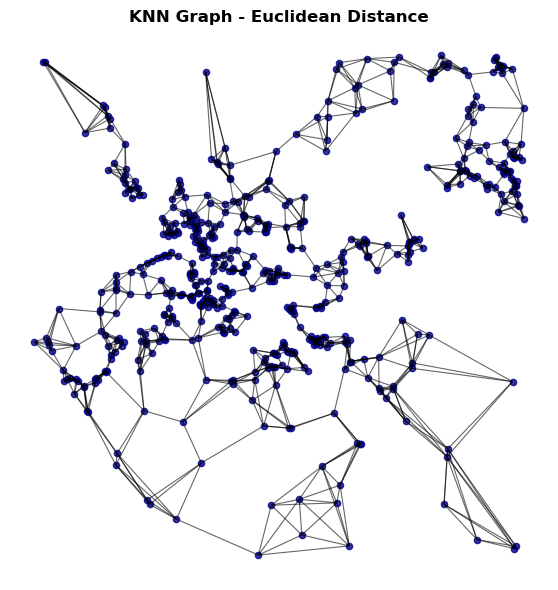

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(18, 6))

# Plot Euclidean distance KNN graph
knn_l2_edges.plot(ax=axes, color='black', alpha=0.6, linewidth=0.8)
knn_l2_nodes.plot(ax=axes, color='darkblue', markersize=20, alpha=0.8)
axes.set_title('KNN Graph - Euclidean Distance', fontsize=12, fontweight='bold')
axes.set_aspect('equal')
axes.axis('off')

plt.tight_layout()
plt.show()

# Random 2D data map

In [35]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# number of points
n = 100

# random coordinates in a given range
x = np.random.uniform(0, 100, n)
y = np.random.uniform(0, 100, n)

# create GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(x, y)])

print(gdf.head())

                    geometry
0    POINT (59.58219 61.028)
1   POINT (6.24309 52.73156)
2    POINT (87.15277 53.902)
3   POINT (0.36746 51.79176)
4  POINT (87.80758 29.28147)


In [37]:
import city2graph

knn_l2_nodes, knn_l2_edges = city2graph.knn_graph(gdf, distance_metric="euclidean")
knn_l2_nodes

,geometry
0,POINT (59.58219 61.028)
1,POINT (6.24309 52.73156)
2,POINT (87.15277 53.902)
3,POINT (0.36746 51.79176)
4,POINT (87.80758 29.28147)
...,...
95,POINT (42.23085 27.48161)
96,POINT (80.53047 48.70171)
97,POINT (77.27892 79.76966)
98,POINT (45.18123 14.29756)


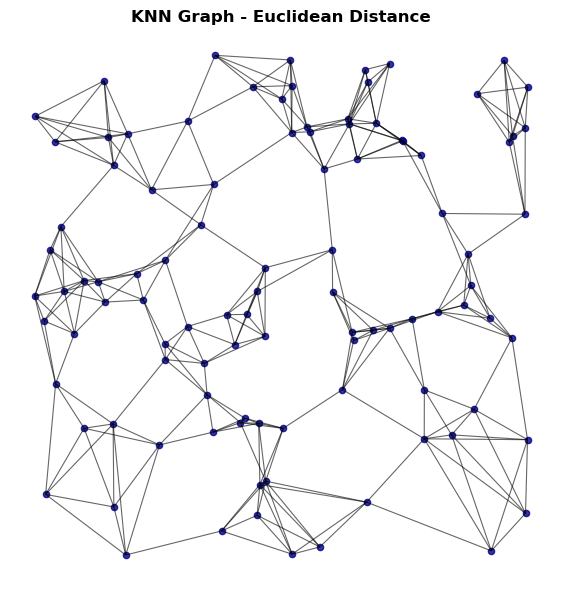

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(18, 6))

# Plot Euclidean distance KNN graph
knn_l2_edges.plot(ax=axes, color='black', alpha=0.6, linewidth=0.8)
knn_l2_nodes.plot(ax=axes, color='darkblue', markersize=20, alpha=0.8)
axes.set_title('KNN Graph - Euclidean Distance', fontsize=12, fontweight='bold')
axes.set_aspect('equal')
axes.axis('off')

plt.tight_layout()
plt.show()

# Read data points from DEG

In [58]:
import deglib as deg
import numpy as np

# read graph from drive
deg_graph = deg.graph.load_readonly_graph("G:/My Drive/HTW/PhD/2DGraph/automatic/L2_dg.deg")

# use features as coords
coords = np.array([deg_graph.get_feature_vector(i) for i in range(deg_graph.size())])
coords[:, 1] = -coords[:, 1]
print(coords.shape)
print(coords)

(14, 2)
[[  9.910933   -10.843841  ]
 [  0.07866925 -11.938601  ]
 [  3.680132    -6.754204  ]
 [  7.962867    -9.129332  ]
 [  6.1275473   -1.0712817 ]
 [  5.5075192   -2.4156318 ]
 [ 10.991627    -7.0038567 ]
 [  6.2168016   -5.8700323 ]
 [ 12.639411    -3.9206796 ]
 [ 12.487656    -3.3339577 ]
 [  0.68076056 -11.355198  ]
 [  9.236214    -6.6003776 ]
 [  6.1726084   -5.2654295 ]
 [  8.510979    -8.267813  ]]


# Small 2D data map

In [59]:
import geopandas as gpd
from shapely.geometry import Point

# create GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in coords])
print(gdf.head())

                    geometry
0  POINT (9.91093 -10.84384)
1   POINT (0.07867 -11.9386)
2    POINT (3.68013 -6.7542)
3   POINT (7.96287 -9.12933)
4   POINT (6.12755 -1.07128)


In [60]:
import city2graph

knn_l2_nodes, knn_l2_edges = city2graph.knn_graph(gdf, distance_metric="euclidean")
knn_l2_edges

geometry    weight
0  3    LINESTRING (9.91093 -10.84384, 7.96287 -9.12933)  2.595092
   13   LINESTRING (9.91093 -10.84384, 8.51098 -8.26781)  2.931858
   6   LINESTRING (9.91093 -10.84384, 10.99163 -7.00386)  3.989157
   11   LINESTRING (9.91093 -10.84384, 9.23621 -6.60038)  4.296769
   7     LINESTRING (9.91093 -10.84384, 6.2168 -5.87003)  6.195593
1  10    LINESTRING (0.07867 -11.9386, 0.68076 -11.3552)  0.838375
   2      LINESTRING (0.07867 -11.9386, 3.68013 -6.7542)  6.312567
   3     LINESTRING (0.07867 -11.9386, 7.96287 -9.12933)  8.369741
   7      LINESTRING (0.07867 -11.9386, 6.2168 -5.87003)  8.631581
   12    LINESTRING (0.07867 -11.9386, 6.17261 -5.26543)  9.036997
2  7       LINESTRING (3.68013 -6.7542, 6.2168 -5.87003)  2.686346
   12     LINESTRING (3.68013 -6.7542, 6.17261 -5.26543)  2.903255
   5      LINESTRING (3.68013 -6.7542, 5.50752 -2.41563)  4.707712
   3      LINESTRING (3.68013 -6.7542, 7.96287 -9.12933)  4.897249
   13     LINESTRING (3.68013 -6.7542, 8.51098 -8.26781)  5.062420
   4      LINESTRING (3.68013 -6.7542, 6.12755 -1.07128)  6.187523
   10     LINESTRING (3.68013 -6.7542, 0.68076 -11.3552)  5.492301
3  13    LINESTRING (7.96287 -9.12933, 8.51098 -8.26781)  1.021098
   11    LINESTRING (7.96287 -9.12933, 9.23621 -6.60038)  2.831434
   7      LINESTRING (7.96287 -9.12933, 6.2168 -5.87003)  3.697536
   6    LINESTRING (7.96287 -9.12933, 10.99163 -7.00386)  3.700139
   10    LINESTRING (7.96287 -9.12933, 0.68076 -11.3552)  7.614693
4  5     LINESTRING (6.12755 -1.07128, 5.50752 -2.41563)  1.480443
   12    LINESTRING (6.12755 -1.07128, 6.17261 -5.26543)  4.194390
   7      LINESTRING (6.12755 -1.07128, 6.2168 -5.87003)  4.799581
   11    LINESTRING (6.12755 -1.07128, 9.23621 -6.60038)  6.343083
5  12    LINESTRING (5.50752 -2.41563, 6.17261 -5.26543)  2.926378
   7      LINESTRING (5.50752 -2.41563, 6.2168 -5.87003)  3.526466
   11    LINESTRING (5.50752 -2.41563, 9.23621 -6.60038)  5.604932
6  11   LINESTRING (10.99163 -7.00386, 9.23621 -6.60038)  1.801186
   13   LINESTRING (10.99163 -7.00386, 8.51098 -8.26781)  2.784098
   8   LINESTRING (10.99163 -7.00386, 12.63941 -3.92068)  3.495880
   9   LINESTRING (10.99163 -7.00386, 12.48766 -3.33396)  3.963113
7  12     LINESTRING (6.2168 -5.87003, 6.17261 -5.26543)  0.606216
   11     LINESTRING (6.2168 -5.87003, 9.23621 -6.60038)  3.106486
   13     LINESTRING (6.2168 -5.87003, 8.51098 -8.26781)  3.318524
   10     LINESTRING (6.2168 -5.87003, 0.68076 -11.3552)  7.793253
8  9   LINESTRING (12.63941 -3.92068, 12.48766 -3.33396)  0.606030
   11   LINESTRING (12.63941 -3.92068, 9.23621 -6.60038)  4.331574
   13   LINESTRING (12.63941 -3.92068, 8.51098 -8.26781)  5.995125
   12   LINESTRING (12.63941 -3.92068, 6.17261 -5.26543)  6.605141
9  11   LINESTRING (12.48766 -3.33396, 9.23621 -6.60038)  4.608836
   13   LINESTRING (12.48766 -3.33396, 8.51098 -8.26781)  6.336946
   12   LINESTRING (12.48766 -3.33396, 6.17261 -5.26543)  6.603817
10 12    LINESTRING (0.68076 -11.3552, 6.17261 -5.26543)  8.200346
11 13    LINESTRING (9.23621 -6.60038, 8.51098 -8.26781)  1.818325
   12    LINESTRING (9.23621 -6.60038, 6.17261 -5.26543)  3.341820
12 13    LINESTRING (6.17261 -5.26543, 8.51098 -8.26781)  3.805559

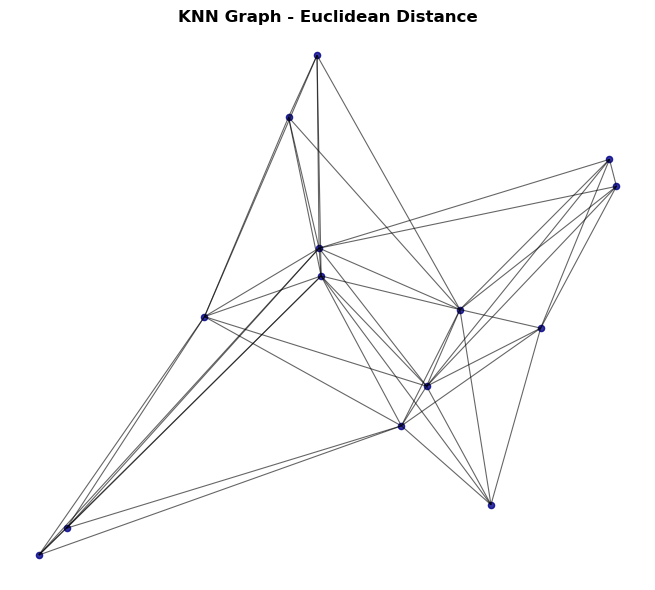

<Figure size 640x480 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(18, 6))

# Plot Euclidean distance KNN graph
knn_l2_edges.plot(ax=axes, color='black', alpha=0.6, linewidth=0.8)
knn_l2_nodes.plot(ax=axes, color='darkblue', markersize=20, alpha=0.8)
axes.set_title('KNN Graph - Euclidean Distance', fontsize=12, fontweight='bold')
axes.set_aspect('equal')
axes.axis('off')

plt.savefig("plot.svg", format="svg")
plt.tight_layout()
plt.show()
